In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

# 1. Apply model based clustering on Data 1
(a) Report the number of clusters and the technique used to find the
number of clusters.
(b) Plot the clusters.
(c) Report the mean, co-variance matrix and prior probability corresponding to each cluster.
(d) Assess the quality of the clusters.


In [96]:
data1 = pd.read_csv('data1.csv')
data1.head()
data1.drop(data1.columns[[0]], axis = 1, inplace = True)
data1.shape


(1600, 2)

In [97]:
data1.isna().sum()
scaler = StandardScaler()
X = scaler.fit_transform(data1)
X = np.array(X)
X

array([[-1.15403565,  1.39995404],
       [-0.21991635, -1.02249967],
       [ 1.35937724, -0.87685543],
       ...,
       [-1.22772782,  1.35528844],
       [ 1.55971659, -1.12893882],
       [ 0.01098062,  0.0543328 ]])

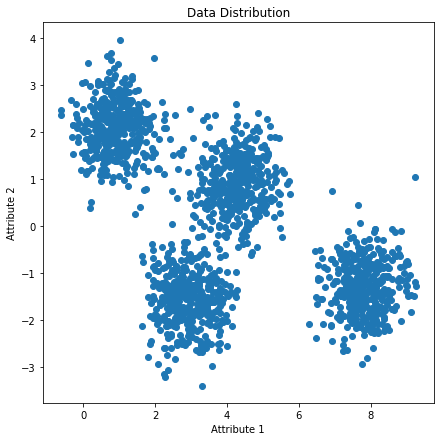

array([[-1.15403565,  1.39995404],
       [-0.21991635, -1.02249967],
       [ 1.35937724, -0.87685543],
       ...,
       [-1.22772782,  1.35528844],
       [ 1.55971659, -1.12893882],
       [ 0.01098062,  0.0543328 ]])

In [98]:
plt.figure(figsize=(7,7))
plt.scatter(data1.iloc[:,0],data1.iloc[:,1])
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Data Distribution')
plt.show()
x=np.cov(data1.T) 
X

In [99]:
# implies 4 clusters are there

from scipy.stats import multivariate_normal

class model_clustering:
    def __init__(self, n_clusters, max_iter):
        self.k = n_clusters
        self.max_iter = max_iter

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mean = [  X[row_index,:] for row_index in random_row ]
        self.cov = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # E-Step: update weights and phi keeping mean and covariance constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
        return self.phi
    
    def m_step(self, X):
        # M-Step: update mean and covariance keeping phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mean[i] = (X * weight).sum(axis=0) / total_weight
            self.cov[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)
        return self.mean,self.cov

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            phi = self.e_step(X)
            m,c = self.m_step(X)
        return phi,m,c
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mean[i], 
                cov=self.cov[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights = self.predict_proba(X)
        return np.argmax(weights, axis=1)

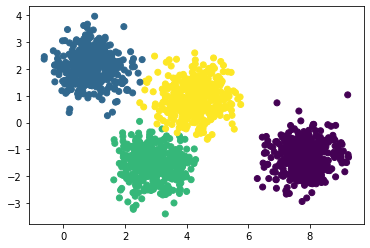

Prior probability corresponding to each cluster :
 cluster 0: 0.24993968863404742 
cluster 1: 0.25064335518559006 
cluster 2: 0.24751030329488471 
cluster 3: 0.25190665288547726
Mean corresponding to each cluster :
 cluster 0: [ 1.48542871 -0.81490985] 
cluster 1: [-1.18572887  1.25187999] 
cluster 2: [-0.41112795 -0.98715542] 
cluster 3: [0.10990531 0.53287219]
Covariance corresponding to each cluster :
 cluster 0: [[0.04993541 0.00590034]
 [0.00590034 0.12675402]] 
cluster 1: [[ 0.050648   -0.00327039]
 [-0.00327039  0.12713224]] 
cluster 2: [[ 0.04959038 -0.00274184]
 [-0.00274184  0.12584083]] 
cluster 3: [[0.05473293 0.00325903]
 [0.00325903 0.1341623 ]]


In [100]:



#np.random.seed(42)
m_cluster = model_clustering(n_clusters=4, max_iter=100)
prior,mean,cov = m_cluster.fit(X)
label = m_cluster.predict(X)
data1['label'] = label
#mean =  pd.DataFrame({'cluster 0':mean[0],'cluster 1':mean[1],'cluster 2':mean[2],'cluster 3':mean[3]})

n_labels = np.unique(label)

#for i in n_labels:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],c=label)
    

plt.show()
print('Prior probability corresponding to each cluster :\n cluster 0:',prior[0],
      '\ncluster 1:',prior[1],'\ncluster 2:',prior[2],'\ncluster 3:',prior[3])
print('Mean corresponding to each cluster :\n cluster 0:',mean[0],
      '\ncluster 1:',mean[1],'\ncluster 2:',mean[2],'\ncluster 3:',mean[3])
print('Covariance corresponding to each cluster :\n cluster 0:',cov[0],
      '\ncluster 1:',cov[1],'\ncluster 2:',cov[2],'\ncluster 3:',cov[3])


# Analyse Data 2 using ICA
(a) Report the values of the parameters.
(b) Find the source signals.

In [7]:
data2 = pd.read_csv('data2.csv')
data2.head()
data2.drop(data2.columns[[0]], axis = 1, inplace = True)
data2


,0,1,2
0,-0.744863,-0.914015,-1.815700
1,0.039325,1.064930,-1.587150
2,-0.407660,0.397869,-1.909981
3,0.033789,0.967298,-1.014872
4,-0.179156,0.695176,-1.491172
...,...,...,...
1995,0.398439,-0.292394,1.984417
1996,0.990135,0.141825,2.818675
1997,0.238568,-0.284869,1.386192
1998,-0.006532,-0.993170,1.481348


In [8]:
data2.isna().sum()

0    0
1    0
2    0
dtype: int64

In [9]:
data2 = (np.array(data2)).reshape(3,2000)

In [10]:
#Centering the data

def center(x):
    mean = np.mean(x,axis=0)
    centered =  x - mean 
    return centered, mean

# Whitening the data
def whiten(x):
    # Calculate the covariance matrix
    cov = np.cov(x)
    
    # Single value decoposition
    U, S, V = np.linalg.svd(cov)
    
    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S)) 
    
    # Calculate whitening matrix
    whiteX = np.dot(U, np.dot(d, U.T))
    
    # Project onto whitening matrix
    Xw = np.dot(whiteX, x) 
    
    return Xw, whiteX

Parameters of the model are:
 [[ 0.27039229  0.26401934  0.14531948]
 [ 0.25507777  0.30953612  0.10178253]
 [-0.57074951 -0.53918824 -0.21988206]]


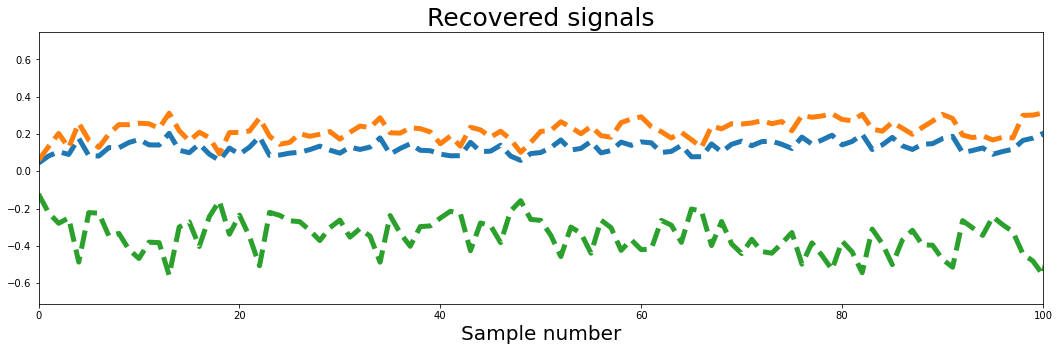

In [12]:
def g(t):
    return (1/(1+np.exp(-1*t)))

def ica(data,  alpha = 1, thresh=1e-4, iterations=100):
    m,n = data.shape
    alpha=1
    W = np.random.rand(m, m)

    for c in range(m):

        w = W[c, :].copy().reshape(m, 1)
        w = w / np.sqrt((w ** 2).sum())
        i = 0
        lim = 10
        while ((lim > thresh) & (i < iterations)):
            W_o = W
            ws = (np.array((data[c]))*w)
            wg = np.dot(data,(1 - 2*g(ws)).T) 
            wg = wg + np.linalg.inv(W_o.T)
            W_new = W_o + alpha*wg

            W_new = W_new / np.sqrt((W_new ** 2).sum())
            lim = np.linalg.norm(W_new - W_o)
            W = W_new
            i+=1
            
            
            
    
    return W_new
    

Xc, meanX = center(data2)

# Whiten mixed signals
Xw, white_x = whiten(Xc)

W = ica(Xw,  alpha=1,thresh=1e-4, iterations=200)
print('Parameters of the model are:\n',W)





fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot((W.dot(Xw)).T, '--', label='Recovered signals', lw=5)
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
ax.set_xlim(0, 100)

plt.show()


# 6. Apply model based clustering on ECG data [UCR Time Series Classification and Clustering website]. Describe the experimental analysis.


In [145]:
d1 = pd.read_csv('ecg3.txt',header=None)
d2 = pd.read_csv('ecg1.txt',header=None)



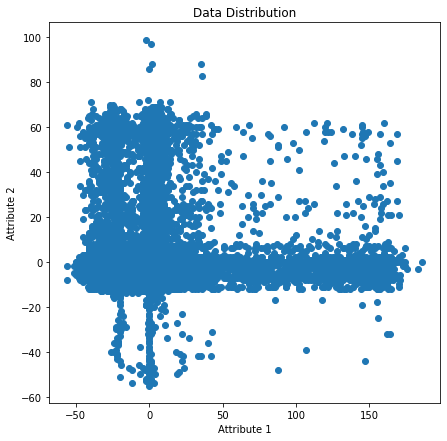

In [146]:
d = [d1,d2]

data3 = pd.concat(d,axis=1)
data3

plt.figure(figsize=(7,7))
plt.scatter(data3.iloc[:,0],data3.iloc[:,-1])
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Data Distribution')
plt.show()



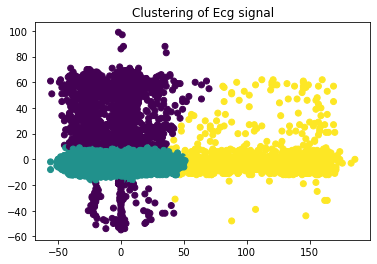

Prior probability corresponding to each cluster :
 cluster 0: 0.09971080049199443 
cluster 1: 0.8564729127113389 
cluster 2: 0.04381628679666178
Mean corresponding to each cluster :
 cluster 0: [-4.04833342 29.80874958] 
cluster 1: [-5.07061263 -2.83858741] 
cluster 2: [116.18826335   0.22789725]
Covariance corresponding to each cluster :
 cluster 0: [[283.61069718   1.64840493]
 [  1.64840493 669.0983631 ]] 
cluster 1: [[253.52908877  -0.81965531]
 [ -0.81965531  17.66742115]] 
cluster 2: [[1433.64220915    8.37230552]
 [   8.37230552  155.26438112]]


In [147]:
data3.isna().sum()
scaler = MinMaxScaler()
X3 = scaler.fit_transform(data3)
X3 = np.array(data3)



np.random.seed(42)
m_cluster = model_clustering(n_clusters=3, max_iter=100)
prior,mean,cov = m_cluster.fit(X3)
label = m_cluster.predict(X3)
data3['label'] = label
n_labels = np.unique(label)

plt.scatter(data3.iloc[:,0],data3.iloc[:,1],c=label)
plt.title('Clustering of Ecg signal')

plt.show()
print('Prior probability corresponding to each cluster :\n cluster 0:',prior[0],
      '\ncluster 1:',prior[1],'\ncluster 2:',prior[2])
print('Mean corresponding to each cluster :\n cluster 0:',mean[0],
      '\ncluster 1:',mean[1],'\ncluster 2:',mean[2])
print('Covariance corresponding to each cluster :\n cluster 0:',cov[0],
      '\ncluster 1:',cov[1],'\ncluster 2:',cov[2])



# Apply ICA on MEG data [http://research.ics.aalto.fi/ica/eegmeg/MEG data.html].
Explain the experimental results obtained.

In [155]:
data6 = pd.read_csv('meg.csv',header=None)

In [157]:
data6.head()

,0,1,2,3,4,5,6,7,8,9,...,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382
0,-48.1,8.93,-15.50,-102.0,-134.0,-65.5,33.0,63.2,-4.53,-93.10,...,-175.0,-175.0,-174.0,-210.00,-224.0,-163.00,-112.000,-124.0,-131.0,-116.0
1,-50.0,-143.00,-226.00,-211.0,-138.0,-99.1,-96.0,-104.0,-137.00,-162.00,...,-171.0,-117.0,-65.1,-28.80,-20.2,-56.10,-87.100,-91.4,-120.0,-157.0
2,33.3,-4.82,-56.30,-4.6,89.9,85.9,32.8,49.0,69.60,8.41,...,-175.0,-178.0,-152.0,-120.00,-112.0,-87.50,-20.300,19.0,-21.4,-91.1
3,-71.8,-66.80,-74.10,-59.2,29.0,83.9,-22.2,-200.0,-256.00,-177.00,...,-88.6,-91.9,-59.7,-45.30,-83.3,-128.00,-159.000,-205.0,-250.0,-240.0
4,160.0,61.30,4.14,52.5,140.0,194.0,202.0,161.0,80.30,29.10,...,-25.2,-41.5,-43.2,-2.71,10.5,2.64,-0.552,-57.6,-163.0,-222.0


In [159]:
data6.isna().sum()
data6.shape

(122, 16383)

Parameters of the model are:
 [[ 2.40464161e-03 -4.05858756e-03 -1.43251641e-03 ... -2.31827591e-03
  -1.74714653e-03 -5.35618582e-05]
 [ 3.32054776e-03 -5.47620004e-03 -2.32104893e-03 ... -3.96356077e-03
  -2.31515564e-03  1.05719033e-03]
 [ 5.61385910e-03 -1.00919821e-02 -3.82846661e-03 ... -6.19468288e-03
  -3.78942039e-03  1.80993325e-03]
 ...
 [-1.48747095e-03  1.73521792e-03  7.72812081e-04 ...  1.43399662e-03
   1.01972991e-03 -9.01368363e-04]
 [-1.39790765e-02  2.21579924e-02  8.81938670e-03 ...  1.47882543e-02
   1.08032246e-02 -4.69463655e-03]
 [-1.18251815e-02  1.94412490e-02  6.96234044e-03 ...  1.30819059e-02
   8.82098350e-03 -4.11335950e-03]]


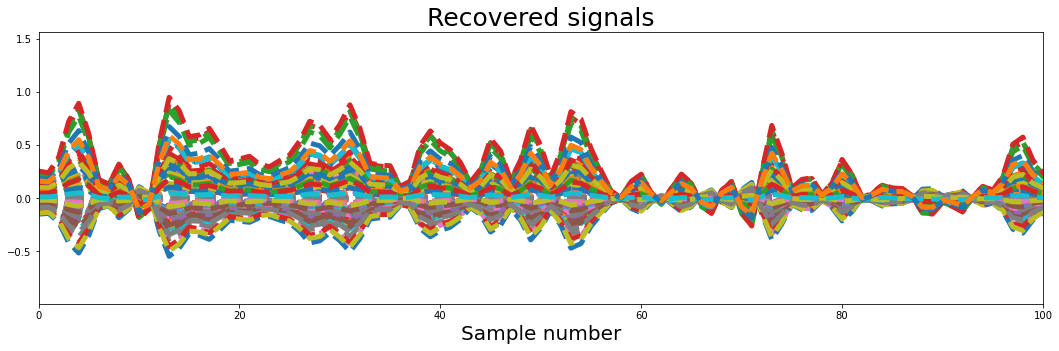

In [161]:
data6 = (np.array(data6)).reshape(122, 16383)

Xc, meanX = center(data6)

# Whiten mixed signals
Xw, white_x = whiten(Xc)

W = ica(Xw,  alpha=1,thresh=1e-4, iterations=200)
print('Parameters of the model are:\n',W)





fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot((W.dot(Xw)).T, '--', label='Recovered signals', lw=5)
ax.set_xlabel('Sample number', fontsize=20)
ax.set_title('Recovered signals', fontsize=25)
ax.set_xlim(0, 100)

plt.show()